### EDA (Exploratory Data Analysis) on - Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()                                       

# In dataset, (Sib Sp : count of Sibling and spouse), (Parch : count of Parent child), 
# Here we have to predict whether the passenger survived or not.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Find out Missing data

In [73]:
train.isnull()         # It is inbuilt func. shows True-False , True : means NaN value

train.isnull().sum()   # It gives the sum of all NaN values of every column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train['Embarked'].value_counts()      # gives category column data 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

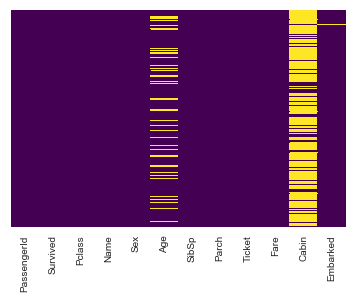

In [74]:
# also we can find using seaborn it shows NaN values acc. to column

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [75]:
a = len(train.Age)    # total len of 'Age' column

b = (train.Age).isnull().sum()    # total missing NaN values in 'Age' column

print(a)
print(b)

b/a *100     # calculating percentage of NaN values acc. to column

891
177


19.865319865319865

In [76]:
x = len(train.Cabin)
y = train.Cabin.isnull().sum()

y/x *100

77.10437710437711

##### Around 20% of the data of 'Age' column is missing  and  77% of 'Cabin' column is missing NaN its huge.

### 2. Check through plots (in this case how many 'Survived')

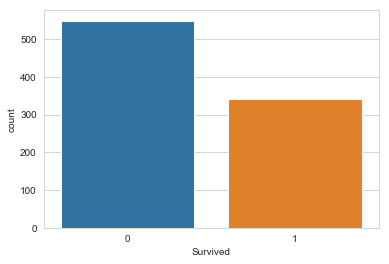

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)                # 0 : Not survived , 1 : Survived

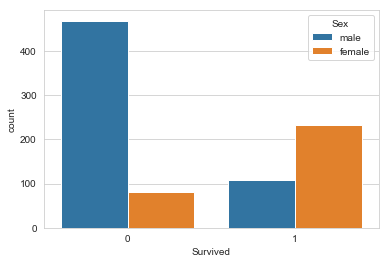

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex')       # Now we divided based on 'Sex'

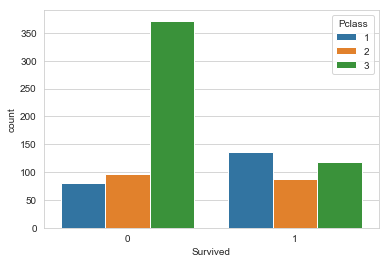

In [79]:
sns.set_style('whitegrid')                                 # Based on Passeneger class
sns.countplot(x='Survived', data=train, hue='Pclass')      # 1 : 1st class , 2 : 2nd class , 3 : 3rd class

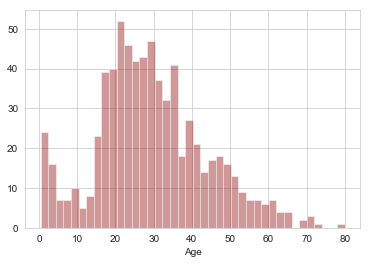

In [80]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)      
# distribution plot of 'Age' and also dropping NaN values
# Kde- kernel density estimation used for creating Probability distribution func. , here we not need it so make it False.
# this graph forms like : normal distribution (Bell- curve)

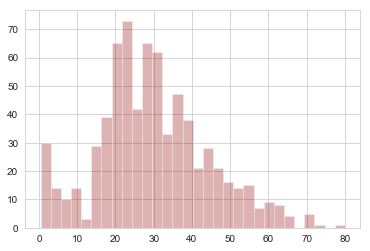

In [81]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)       # bins are like no. of bars (or pillars)

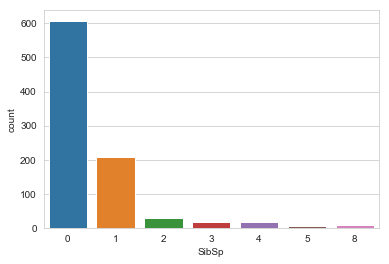

In [82]:
sns.countplot(x='SibSp', data=train)     # Here we counting how many people have SibSp : Sibling+spouse , with them 0,1,2 or 3..

## 3. Data Cleaning

##### fill the NaN values or Remove it. Here we creating Boxplot for taking the Average of 'Age' column w.r.t the 'Pclass'  and replace the NaN values with the average age of 'Age' column acc. to 'Pclass: 1,2,3' .

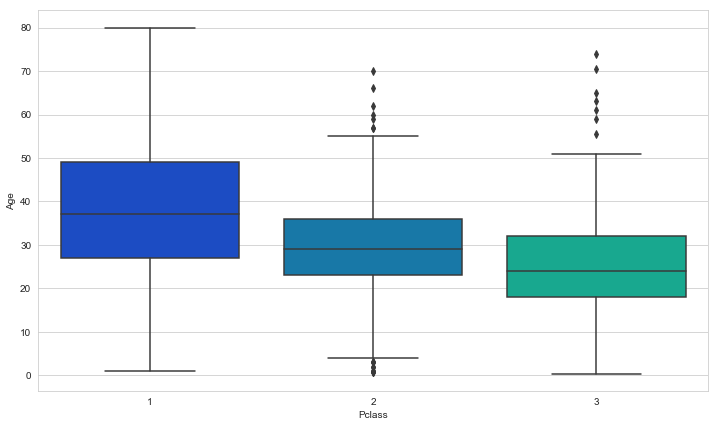

In [83]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter') 

##### Here we can see in the Boxplot graph, the average age in ( 1st class is around -> 37 ) , (2nd : 29) , (3rd : 24)

In [84]:
def impute_age(cols):
    Age = cols[0]              # Here we giving 1st column 'Age' and 2nd column 'Pclass'
    Pclass = cols[1]   
    
    if pd.isnull(Age):          # it means True , there is NaN value in 'Age' column
        
        if Pclass == 1:            # if 'Pclass' belongs to 1st class then fill NaN with 37 
            return 37
        
        elif Pclass == 2:          # and here for 2nd :  fill 29
            return 29
        
        else:
            return 24               # and here for 3rd : fill 24
        
    else:
        return Age

In [85]:
# Now apply that function

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

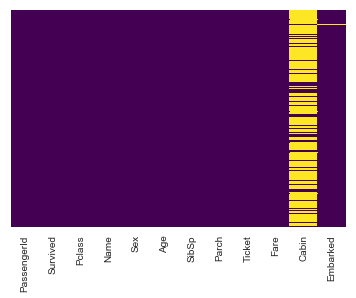

In [86]:
# Now we see that with Heatmap again as earlier, and see the 'Age' column NaN values are replaced with average values.

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### Now comes the 'Cabin' column here we can see there are so many NaN values, 1 thing is we can apply Feature Engineering but this makes it more complicated and  2nd we drop this column.

In [87]:
train.drop('Cabin', axis=1, inplace=True)        # dropping 'Cabin' column

In [88]:
# train['Embarked'].fillna('S', inplace=True)         # Dropping NaN value of 'Embedded' column also it has 2 NaN value.

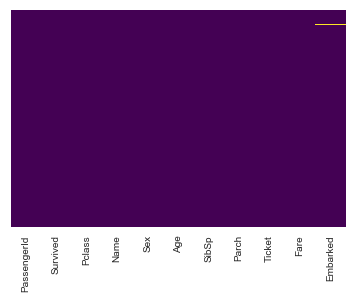

In [89]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')       # we can see through the heatmap

In [90]:
train.head()        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Now handle Categorical features

In [91]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)      # 'Embarked' has 3 columns and also dropping 1st column.
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [92]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)   # Dropping columns no need of them.

In [93]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [94]:
train = pd.concat([train,sex,embark], axis=1)     # Now concatenate  sex and embark categorical data with  train dataset

In [95]:
train.head()           # Now we have our dataset is ready.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## 4. Building Logistic Regression model

In [96]:
# Dividing the dataset into dependent , independent features

X = train.drop('Survived', axis=1)       # bcoz 'Survived' is our dependent feature  and all remaining are independent features
y = train['Survived']                    # 'Survived' column 

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.30)

In [99]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
predictions = logmodel.predict(X_test)

#### Check Accuracy and metrics of model

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)

In [108]:
print('confusion matrix : \n\n', cm)
print('\nAccuracy is : ', acc*100)

confusion matrix : 

 [[135  19]
 [ 41  73]]

Accuracy is :  77.61194029850746
